In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm.notebook import tqdm
import numpy as np
from src.data import load_radar, load_annotation
from src.models.thresholdingRadarSum import ThresholdingRadarSum
from src.post_analysis import WeightChangeCalculator

- [x] implement get_area_under_radarsum()
- [x] implement the prediction interval for manual algorithm
- [x] implement weight change calculator

In [3]:
annotations = load_annotation.get_annotation()

# get all the defecation user_ids
defecate_ids = load_annotation.get_complete_ids('Defecation')
defecate_ids = defecate_ids[defecate_ids > 1000]

# Generate

In [4]:
# loop to get all the weight change and 
# area under curve
weight_changes = []
area_under_radars = []
indices = []
for user_id in tqdm(defecate_ids):
    try:
        weightChange = WeightChangeCalculator(user_id)
        annotated_intervals = []
        for event in annotations[user_id]:
            if event.event == 'Defecation':
                annotated_intervals.append([event.start, event.stop])
        weight_change = weightChange.get_weight_change(
            annotated_intervals, window_size=9)

        area_under_radar = load_radar.get_area_under_radarsum(user_id, window_size = 9)
        
        indices.append(user_id)
        weight_changes.append(weight_change)
        area_under_radars.append(area_under_radar)
    except:
        print(f'fail {user_id}')
        continue

  0%|          | 0/59 [00:00<?, ?it/s]

fail 1898


# Save results

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

In [14]:
res_df = pd.DataFrame({
    'weight_change': weight_changes,
    'area_under_radarsum': area_under_radars
}, index=defecate_ids[defecate_ids != 1898])#.to_csv('../data/processed/correlation-radar-sum-defecate-weight.csv')

res_df.to_csv('../data/processed/correlation-radar-sum-defecate-weight.csv')

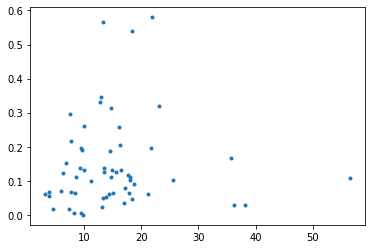

In [8]:
plt.plot(res_df['area_under_radarsum'], res_df['weight_change'], '.')

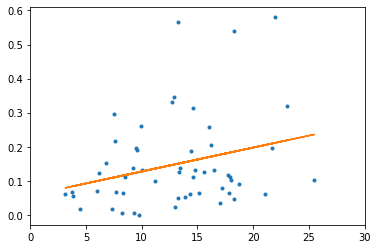

In [13]:
x = np.array(area_under_radars)
y = np.array(weight_changes)

excluded = x > 30
x = x[~excluded]
y = y[~excluded]

m, b = np.polyfit(x, y, 1)
yhat = m * x + b

plt.plot(x, y, '.')
plt.plot(x, yhat)
plt.xlim(0, 30)
pass